In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install split-folders[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import splitfolders
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

In [5]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/model.h5')

# Check its architecture
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [6]:
# Split dataset into class folders
import os
import shutil

# define the input directory containing the mixed images
input_dir = "/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/known_images"

# define the output directories for normal and sick images
normal_dir = "/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/Dataset/Normal"
sick_dir = "/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/Dataset/Infected"

# create the output directories if they don't already exist
os.makedirs(normal_dir, exist_ok=True)
os.makedirs(sick_dir, exist_ok=True)

# loop through all files in the input directory
for filename in os.listdir(input_dir):
    # check if the filename contains "normal"
    if "normal" in filename:
        # copy the file to the normal output directory
        shutil.copy(os.path.join(input_dir, filename), normal_dir)
    # check if the filename contains "sick"
    elif "sick" in filename:
        # copy the file to the sick output directory
        shutil.copy(os.path.join(input_dir, filename), sick_dir)
    else:
        # ignore files that don't contain "normal" or "sick"
        pass

In [7]:
# Splitting dataset into train, val and test set
splitfolders.ratio("/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/Dataset",output='data',seed=77,ratio=(0.7,0.15,0.15))

Copying files: 715 files [00:03, 228.63 files/s]


In [8]:
val_data_dir = 'data/val'

In [9]:
target_size = (224,224)
input_shape = (224,224,3)
learning_rate = 0.0001
epochs = 50
batch_size = 32
dropout = 0.5

In [10]:
# Creating image generator for test set
test_image_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [11]:
# Validation set
val_generator =  test_image_gen.flow_from_directory(val_data_dir,
                                              target_size=target_size,
                                              batch_size=batch_size,
                                              class_mode='binary',
                                              shuffle=True)

Found 106 images belonging to 2 classes.


In [12]:
# Evaluate the restored model
loss, acc = new_model.evaluate(val_generator, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

print(new_model.predict(val_generator).shape)

4/4 - 26s - loss: 0.1458 - accuracy: 0.9717 - 26s/epoch - 6s/step
Restored model, accuracy: 97.17%
4/4 [==============================] - 21s 5s/step
(106, 1)


**Dataset1 Unknow Images**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm


In [49]:
folder_path = 'unknown_images/unknown_images'
IMAGE_SIZE =(150, 150)

def load_data():
  directory ='/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images'
  output = []
  images = []

  for file in tqdm(os.listdir(directory), desc='lOADING UNKNOWN_IMAGES: '):
    img_path = os.path.join(directory, file)
    image =cv2.imread(img_path,0)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMAGE_SIZE)
    image = np.array(image)
    images.append(image)

  return images

In [50]:
def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    array = preprocess_input(array)
    array = np.expand_dims(array, axis=0)
    return array

In [51]:
validAug = ImageDataGenerator(preprocessing_function=preprocess_input) 

In [52]:
unknown = load_data()

lOADING UNKNOWN_IMAGES: 100%|██████████| 50/50 [00:00<00:00, 154.36it/s]


In [53]:
unknown_images = np.array(unknown)
unknown_images =validAug.flow(x =unknown_images , y = None, batch_size=32, shuffle = False )

In [55]:
unknown_predictions = new_model.predict(unknown_images)
# Since we are using a sigmoid activation fxn for the output layer, we define the threshold to 0.5 when defining the binary classes
unknown_labels = unknown_predictions > 0.5
unknown_labels

2/2 [==============================] - 4s 1s/step


array([[ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True]])

In [56]:
# convert True to 1 and False to 0
unknown_labels = unknown_labels.astype(int)
unknown_labels 

array([[1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1]])

In [57]:
unknown_labels = np.ravel(unknown_labels)
unknown_labels 

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1])

**Save the results**

In [58]:
directory ='/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_images/'
image_name = os.listdir(directory)

In [33]:
unknown_csv = pd.DataFrame({'Unknown_images':image_name, 'Diagnosis':unknown_labels})

In [63]:
unknown_csv.sort_values(by=['Unknown_images'], inplace=True)

In [64]:
unknown_csv = unknown_csv.reset_index(drop=True)
unknown_csv['Diagnosis'].replace({0: "Infected", 1:'Normal'}, inplace=True)

In [65]:
unknown_csv

,Unknown_images,Diagnosis
0,1.png,Normal
1,10.png,Infected
2,11.png,Normal
3,12.png,Infected
4,13.png,Infected
5,14.png,Infected
6,15.png,Normal
7,16.png,Infected
8,17.png,Normal
9,18.png,Infected


In [66]:
unknown_csv = unknown_csv.sort_values('Unknown_images', ascending=True)

In [67]:
unknown_csv

,Unknown_images,Diagnosis
0,1.png,Normal
1,10.png,Infected
2,11.png,Normal
3,12.png,Infected
4,13.png,Infected
5,14.png,Infected
6,15.png,Normal
7,16.png,Infected
8,17.png,Normal
9,18.png,Infected


In [69]:
# Extract the numerical part from the "Unknown_images" column
unknown_csv['NumericValue'] = unknown_csv['Unknown_images'].str.extract('(\d+)').astype(int)

# Sort the DataFrame by the "NumericValue" column in ascending order
df_sorted = unknown_csv.sort_values('NumericValue')

# Remove the temporary "NumericValue" column
df_sorted = df_sorted.drop('NumericValue', axis=1)

print(df_sorted)

   Unknown_images Diagnosis
0           1.png    Normal
11          2.png  Infected
22          3.png    Normal
33          4.png  Infected
44          5.png    Normal
46          6.png  Infected
47          7.png    Normal
48          8.png  Infected
49          9.png  Infected
1          10.png  Infected
2          11.png    Normal
3          12.png  Infected
4          13.png  Infected
5          14.png  Infected
6          15.png    Normal
7          16.png  Infected
8          17.png    Normal
9          18.png  Infected
10         19.png    Normal
12         20.png  Infected
13         21.png    Normal
14         22.png  Infected
15         23.png    Normal
16         24.png    Normal
17         25.png    Normal
18         26.png  Infected
19         27.png    Normal
20         28.png  Infected
21         29.png    Normal
23         30.png  Infected
24         31.png    Normal
25         32.png  Infected
26         33.png    Normal
27         34.png  Infected
28         35.png   

In [73]:
# Save the DataFrame to a CSV file
df_sorted.to_csv('/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_labels_dataset1.csv', index=False)

In [74]:
# Save the DataFrame to a CSV file
df_sorted.to_excel('/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset1/unknown_labels_dataset1.xlsx', index=False)

**Dataset2 Images**

In [ ]:
IMAGE_SIZE =(150, 150)

def load_data():
  directory ='/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images'
  images = []
  output = []
  image_name = []

  for file in tqdm(os.listdir(directory), desc='LOADING DATASET2 IMAGES: '):
    img_path = os.path.join(directory, file)
    image_name.append(img_path.split("/")[-1])
    image = cv2.imread(img_path,0)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMAGE_SIZE)
    image = np.array(image)
    images.append(image)
  return images, image_name
     

In [ ]:
dataset2, dataset2_names = load_data()

LOADING DATASET2 IMAGES: 100%|██████████| 224/224 [00:03<00:00, 71.47it/s] 


In [ ]:
dataset2_images = np.array(dataset2)
dataset2_images.shape

(224, 150, 150, 3)

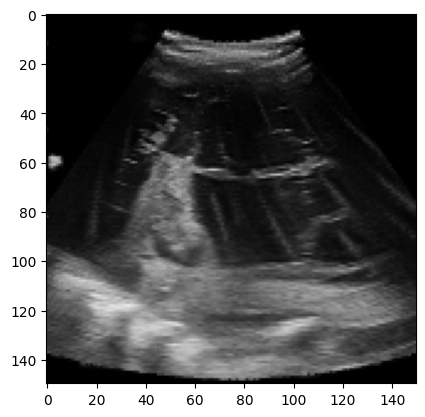

In [ ]:
plt.imshow(dataset2_images[4])

In [ ]:
dataset2_labels = pd.read_csv('/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/image_classes.csv')

In [ ]:
dataset2_labels.columns = ['patient', 'True_Diagnosis']

In [ ]:
dataset2_labels.sort_values(by=['patient'], inplace=True)
dataset2_labels.reset_index(drop=True, inplace=True)
dataset2_labels

,patient,True_Diagnosis
0,sick_eff0,0
1,sick_eff1,0
2,sick_eff10,0
3,sick_eff100,0
4,sick_eff101,0
...,...,...
219,sick_eif95,1
220,sick_eif96,1
221,sick_eif97,1
222,sick_eif98,1


In [ ]:
dataset2_images =validAug.flow(
    x =dataset2_images , 
    y = None,
    batch_size=32,
    shuffle = False
        )
     

In [ ]:
dataset2_predictions = new_model.predict(dataset2_images)
dataset2_predicted_labels = dataset2_predictions > 0.5


7/7 [==============================] - 23s 3s/step


In [ ]:
dataset2_predicted_labels

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [

In [ ]:
# convert True to 1 and False to 0
dataset2_predicted_labels = dataset2_predicted_labels.astype(int)
dataset2_predicted_labels 

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
# Convert the array to a 1D array of 1s and 0s
dataset2_predicted_labels  = np.squeeze(dataset2_predicted_labels.astype(int))
dataset2_predicted_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [ ]:
dataset2_names

['sick_eff94.png',
 'sick_eff11.png',
 'sick_eff92.png',
 'sick_eif0.png',
 'sick_eff85.png',
 'sick_eif6.png',
 'sick_eif91.png',
 'sick_eif85.png',
 'sick_eif12.png',
 'sick_eif44.png',
 'sick_eif36.png',
 'sick_eff111.png',
 'sick_eif105.png',
 'sick_eff88.png',
 'sick_eif10.png',
 'sick_eif98.png',
 'sick_eif43.png',
 'sick_eff100.png',
 'sick_eff51.png',
 'sick_eif4.png',
 'sick_eif104.png',
 'sick_eif87.png',
 'sick_eif99.png',
 'sick_eif2.png',
 'sick_eif102.png',
 'sick_eif68.png',
 'sick_eif7.png',
 'sick_eff69.png',
 'sick_eff62.png',
 'sick_eff13.png',
 'sick_eff90.png',
 'sick_eff96.png',
 'sick_eif93.png',
 'sick_eff53.png',
 'sick_eff59.png',
 'sick_eif101.png',
 'sick_eif27.png',
 'sick_eff21.png',
 'sick_eif64.png',
 'sick_eif76.png',
 'sick_eif77.png',
 'sick_eif40.png',
 'sick_eff45.png',
 'sick_eif15.png',
 'sick_eif100.png',
 'sick_eif53.png',
 'sick_eff18.png',
 'sick_eif110.png',
 'sick_eif75.png',
 'sick_eff80.png',
 'sick_eff23.png',
 'sick_eff38.png',
 'sick_ef

In [ ]:
dataset2_csv = pd.DataFrame({'patient':dataset2_names, 'Predicted_Diagnosis':dataset2_predicted_labels})
dataset2_csv

,patient,Predicted_Diagnosis
0,sick_eff94.png,0
1,sick_eff11.png,0
2,sick_eff92.png,0
3,sick_eif0.png,0
4,sick_eff85.png,0
...,...,...
219,sick_eff76.png,0
220,sick_eif20.png,0
221,sick_eff42.png,0
222,sick_eff106.png,0


In [ ]:
dataset2_labels['Predicted_Diagnosis'] = dataset2_csv.Predicted_Diagnosis
dataset2_labels

,patient,True_Diagnosis,Predicted_Diagnosis
0,sick_eff0,0,0
1,sick_eff1,0,0
2,sick_eff10,0,0
3,sick_eff100,0,0
4,sick_eff101,0,0
...,...,...,...
219,sick_eif95,1,0
220,sick_eif96,1,0
221,sick_eif97,1,0
222,sick_eif98,1,0


In [ ]:
dataset2_labels.to_csv('/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/my_images_classes_and_labels.csv')

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score

In [ ]:
print(classification_report(dataset2_labels['True_Diagnosis'], dataset2_labels['Predicted_Diagnosis']))

              precision    recall  f1-score   support

           0       0.52      0.97      0.67       112
           1       0.77      0.09      0.16       112

    accuracy                           0.53       224
   macro avg       0.64      0.53      0.42       224
weighted avg       0.64      0.53      0.42       224



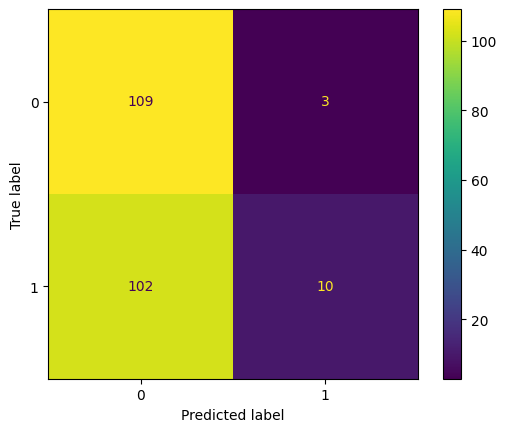

In [ ]:
cm = confusion_matrix(dataset2_labels['True_Diagnosis'], dataset2_labels['Predicted_Diagnosis'])
cm_plot_labels = ['Sick','Normal']
ConfusionMatrixDisplay(cm).plot()

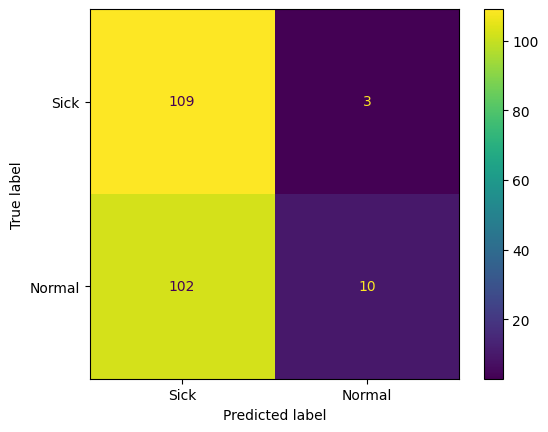

In [ ]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cm_plot_labels)
disp.plot()

In [ ]:
dataset2_labels

,patient,True_Diagnosis,Predicted_Diagnosis
0,sick_eff0,0,0
1,sick_eff1,0,0
2,sick_eff10,0,0
3,sick_eff100,0,0
4,sick_eff101,0,0
...,...,...,...
219,sick_eif95,1,0
220,sick_eif96,1,0
221,sick_eif97,1,0
222,sick_eif98,1,0


In [ ]:
# Set the directory where the images are stored
img_dir = '/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/images'

In [ ]:
cr = classification_report(dataset2_labels['True_Diagnosis'], dataset2_labels['Predicted_Diagnosis'], output_dict=True)
dataset2_report = pd.DataFrame(cr).T

In [ ]:
dataset2_report.to_csv('/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/dataset2_predictions.csv')
     

In [ ]:
np.savetxt("/content/drive/MyDrive/MCS/Sem 2/Deep Learning/Deep_learning_assigmnent_2/dataset2/image_labes.csv", dataset2_predicted_labels, delimiter=',')